/Users/mojtabaeshghie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


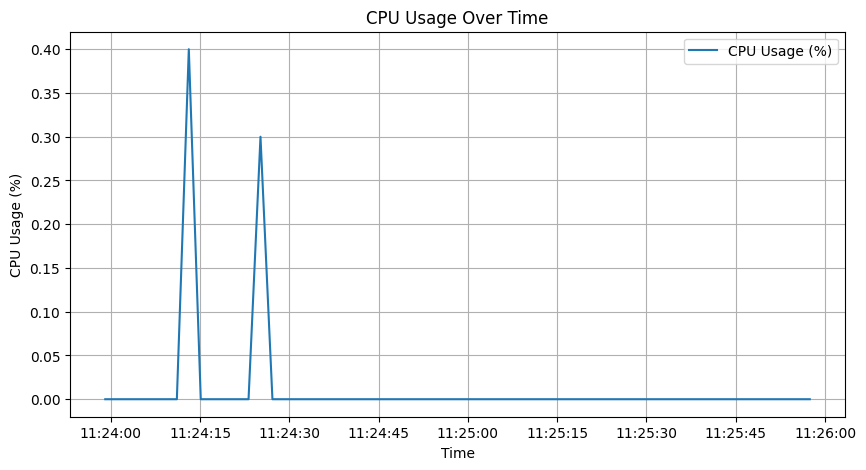

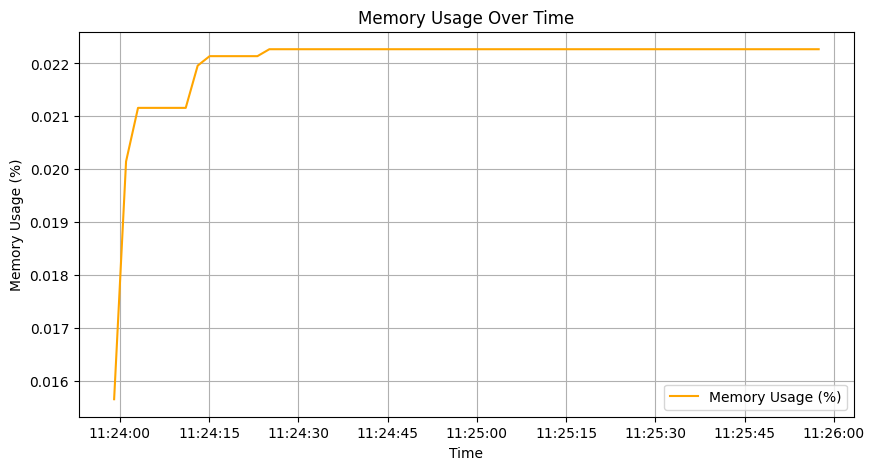

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("anvil_usage.csv")

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Plot CPU usage
plt.figure(figsize=(10, 5))
plt.plot(df['timestamp'], df['cpu_percent'], label='CPU Usage (%)')
plt.xlabel('Time')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot Memory usage
plt.figure(figsize=(10, 5))
plt.plot(df['timestamp'], df['memory_percent'], label='Memory Usage (%)', color='orange')
plt.xlabel('Time')
plt.ylabel('Memory Usage (%)')
plt.title('Memory Usage Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'anvil_usage.csv'  # Update this path
df = pd.read_csv(file_path)

# Convert timestamp to datetime and then to relative time
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['relative_time'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds()

# Convert memory_percent to actual memory usage (32GB of RAM)
total_memory_gb = 32
df['memory_usage_gb'] = df['memory_percent'] / 100 * total_memory_gb

# Display the first few rows to verify
print(df.head())


                      timestamp  cpu_percent  memory_percent  relative_time  \
0 2024-06-23 11:23:59.057004032          0.0        0.015652       0.000000   
1 2024-06-23 11:24:01.062213120          0.0        0.020146       2.005209   
2 2024-06-23 11:24:03.072413952          0.0        0.021160       4.015410   
3 2024-06-23 11:24:05.076165120          0.0        0.021160       6.019161   
4 2024-06-23 11:24:07.084431104          0.0        0.021160       8.027427   

   memory_usage_gb  
0         0.005009  
1         0.006447  
2         0.006771  
3         0.006771  
4         0.006771  


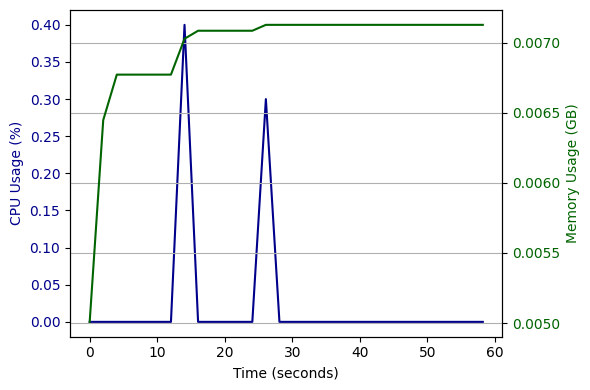

In [11]:
# Plot both CPU and Memory Usage
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot CPU Usage
ax1.plot(df['relative_time'][0:30], df['cpu_percent'][0:30], color='darkblue', label='CPU Usage (%)')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('CPU Usage (%)', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Plot Memory Usage
ax2 = ax1.twinx()
ax2.plot(df['relative_time'][0:30], df['memory_usage_gb'][0:30], color='darkgreen', label='Memory Usage (GB)')
ax2.set_ylabel('Memory Usage (GB)', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')

# Title and layout adjustments
#fig.suptitle('CPU and Memory Usage Over Time')
fig.tight_layout()
plt.grid(True)
plt.show()


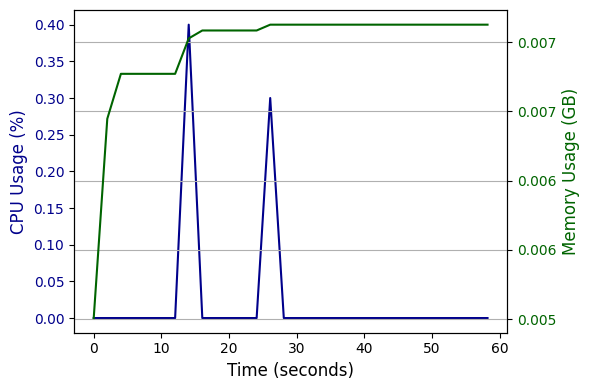

In [12]:
import matplotlib.pyplot as plt

# Plot both CPU and Memory Usage
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot CPU Usage
ax1.plot(df['relative_time'][0:30], df['cpu_percent'][0:30], color='darkblue', label='CPU Usage (%)')
ax1.set_xlabel('Time (seconds)', fontsize=12)
ax1.set_ylabel('CPU Usage (%)', color='darkblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='darkblue', labelsize=10)
ax1.tick_params(axis='x', labelsize=10)

# Plot Memory Usage
ax2 = ax1.twinx()
ax2.plot(df['relative_time'][0:30], df['memory_usage_gb'][0:30], color='darkgreen', label='Memory Usage (GB)')
ax2.set_ylabel('Memory Usage (GB)', color='darkgreen', fontsize=12)
ax2.tick_params(axis='y', labelcolor='darkgreen', labelsize=10)

# Format memory usage to show fewer decimal places
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))

# Title and layout adjustments
fig.tight_layout()
plt.grid(True)
plt.show()


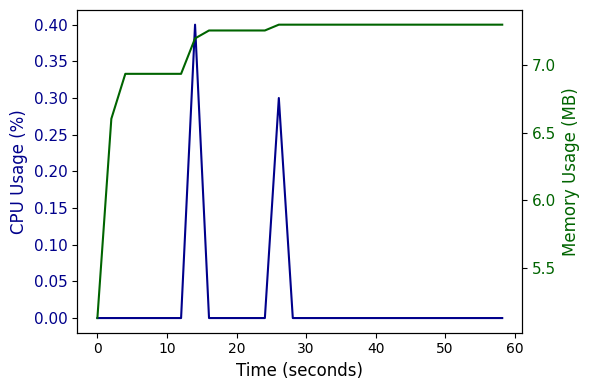

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'anvil_usage.csv'  # Update this path
df = pd.read_csv(file_path)

# Convert timestamp to datetime and then to relative time
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['relative_time'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds()

# Convert memory_percent to actual memory usage (32GB of RAM) in MB
total_memory_mb = 32 * 1024
df['memory_usage_mb'] = df['memory_percent'] / 100 * total_memory_mb

# Plot both CPU and Memory Usage
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot CPU Usage
ax1.plot(df['relative_time'][0:30], df['cpu_percent'][0:30], color='darkblue', label='CPU Usage (%)')
ax1.set_xlabel('Time (seconds)', fontsize=12)
ax1.set_ylabel('CPU Usage (%)', color='darkblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='darkblue', labelsize=11)
ax1.tick_params(axis='x', labelsize=10)

# Plot Memory Usage
ax2 = ax1.twinx()
ax2.plot(df['relative_time'][0:30], df['memory_usage_mb'][0:30], color='darkgreen', label='Memory Usage (MB)')
ax2.set_ylabel('Memory Usage (MB)', color='darkgreen', fontsize=12)
ax2.tick_params(axis='y', labelcolor='darkgreen', labelsize=11)

# Identify and label CPU spikes
cpu_spike_threshold = 50  # Define a threshold for CPU spike
spike_indices = df.index[df['cpu_percent'] > cpu_spike_threshold].tolist()
for i in spike_indices:
    ax1.annotate(f'{df["cpu_percent"][i]:.1f}%', 
                 xy=(df['relative_time'][i], df['cpu_percent'][i]), 
                 xytext=(df['relative_time'][i], df['cpu_percent'][i] + 5),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10, color='darkblue')

# Title and layout adjustments
fig.savefig('perf.pdf')
fig.tight_layout()
plt.show()
